# GALAXPY tutorial

Jonas Chaves-Montero 2019


In this file we will obtain synthetic low resolution spectra and LSST observed magnitudes at z=0.5 and z=1

### Python packages required to run GALAXPY

The python version is Python 3.x. Packages required:

#### Native

os, subprocess, glob, sys

#### Non-native (optional between brackets)

numpy, scipy, natsort, astropy, (extinction), (pickle)

### Load some packages for this notebook

In [1]:
# %load first_cell.py
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import os
import sys
import matplotlib.pyplot as plt

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.26, 
                      Om0=0.314, 
                      Ob0=0.049)

from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

def ls_level(folder, nlevels):
    for ii in range(nlevels):
        folder = os.path.dirname(folder)
    folder += '/'
    return folder

path_program = ls_level(os.getcwd(), 1)
print(path_program)
sys.path.append(path_program)

/home/jchavesmontero/github/galaxpy/


In [2]:
from src.galaxpy import galaxy_sed

## Input 

#### SFH

- SFH_tt (numpy array, yr)
- SFH_sf (numpy array, Msun/yr)

(178,) (4, 2, 1000, 178)


<IPython.core.display.Javascript object>


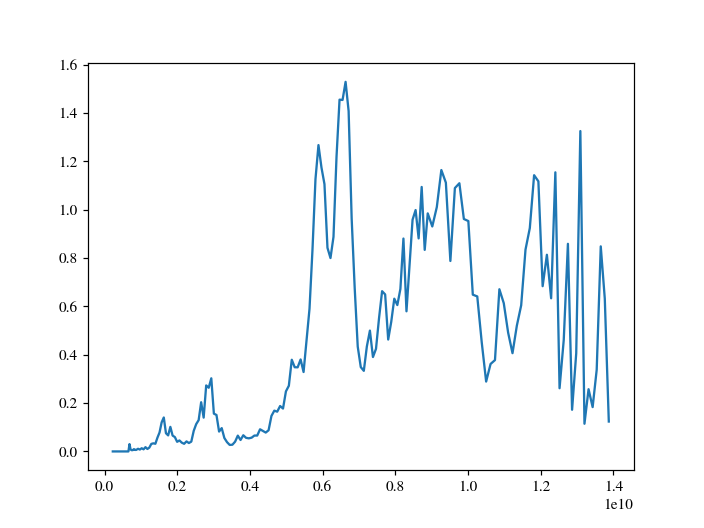

In [3]:
# Load SFH of UniverseMachine star-forming galaxy in a 11.5 Msun/h halo

tt = np.load(path_program+'SFH_data/umachine_tz.npy')
sfh_all = np.load(path_program+'SFH_data/umachine_sfh4.npy')

# sfh_all(halo_mass, type, ngal, nsnap)
# halo_mass 11.5, 12, 12.5, 13 Msun/h
# type sf, q
print(tt.shape, sfh_all.shape)

SFH_tt = tt*1e9
SFH_sf = sfh_all[0, 0, 0, :]
plt.plot(SFH_tt, SFH_sf)

In [4]:
plt.close()

#### Metallicity

Discrete parameter. Options supported:

Padova1994 (default): 0.0001, 0.0004, 0.004, 0.008, 0.02, 0.05, 0.1

Padova2000: 0.0004, 0.001, 0.004, 0.008, 0.019, 0.03

In [4]:
metal = np.array([0.0001, 0.0004, 0.004, 0.008, 0.02, 0.05, 0.1])
metal = 0.02

#### IMF 

Discrete parameter. Options supported:
- 'salp' (salpeter)
- 'chab' (chabrier)
- 'kroup' (kroupa)

In [5]:
IMF = 'chab'

#### Extinction model

Dictionary with parameters:

Flag (options available)

- N (No extinction)
- galaxev (Charlot and Fall 2000 extinction model)
- calzetti
- fitzpatrick07
- fitzpatrick
- odonnell
- cardelli

Each model have different number of parameters. The fiducial model is galaxev, with two continous free parameters:

- tau_V (float)
- etau_V (float)

In [6]:
dust = {'flag': 'galaxev',
        'tau_V':'0.5',
        'etau_V':'0.2'}

#### Emission line model

Dictionary with parameters:

- flag: 'Y' or 'N'
- metal_line: 0.0001, 0.0002, 0.0005,0.001, 0.002, 0.004, 0.006, 0.008, 0.010, 0.014, 0.017, 0.020, 0.030, 0.040
- log_io: -1. , -1.5, -2. , -2.5, -3. , -3.5, -4.     

In [7]:
em_lines = {'flag': 'Y',
            'metal_line':0.02,
            'log_io':-3.5}

#### Other parameters

In [8]:
seed = 'test0' # Name of this run
survey_filt = 'all_lsst' # LSST bands (ugrizY)
flag_mag = 'Y' # compute observed magnitudues in introduced filters
flag_IGM_ext = 'N' # apply intergalactic extinction (only important at high redshift)

In [9]:
# Put everything in the same dictionary

params = {'metallicity': metal,
          'IMF': IMF,
          'dust': dust,
          'survey_filt': survey_filt,
          'flag_mag': flag_mag,
          'em_lines': em_lines,
          'flag_IGM_ext': flag_IGM_ext,
          'cosmo': cosmo,
          'seed': seed}

## Run program

For each SFH, run the following cell first

In [100]:
xx = galaxy_sed(params, 
                SFH_tt=SFH_tt, 
                SFH_sf=SFH_sf)

Then, we can obtain magnitudes/spectra at different redshifts using

In [105]:
zz = np.array([0.5, 1.0])
xx.run_galaxev_gpl(zz)

## Plot results

Spectra

Redshift 0.5


<IPython.core.display.Javascript object>


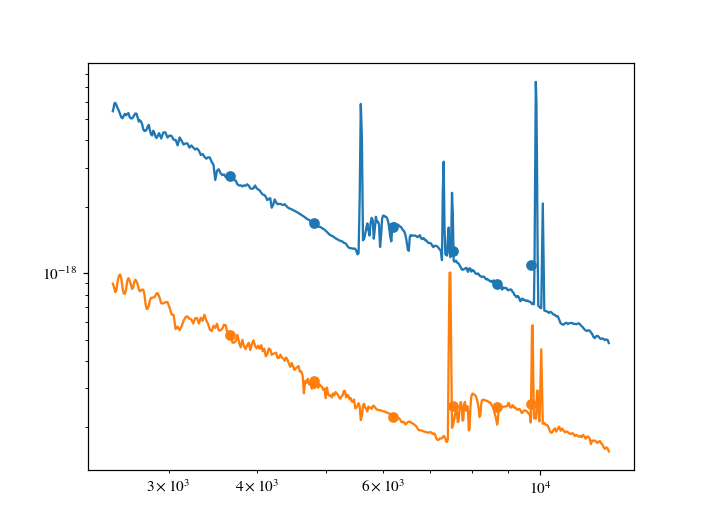

Redshift 1.0


In [107]:
for ii in range(0, zz.shape[0]):
    print('Redshift', xx.zz[ii])
    # spectra
    plt.loglog(xx.wav, xx.flux_obs[:, ii], 'C'+str(ii))
    # convolved flux in bands
    plt.plot(xx.filter_pivot, xx.obs_flux[:, ii], 'C'+str(ii)+'o')

In [22]:
plt.close()

Magnitudes

Redshift 0.5


<IPython.core.display.Javascript object>


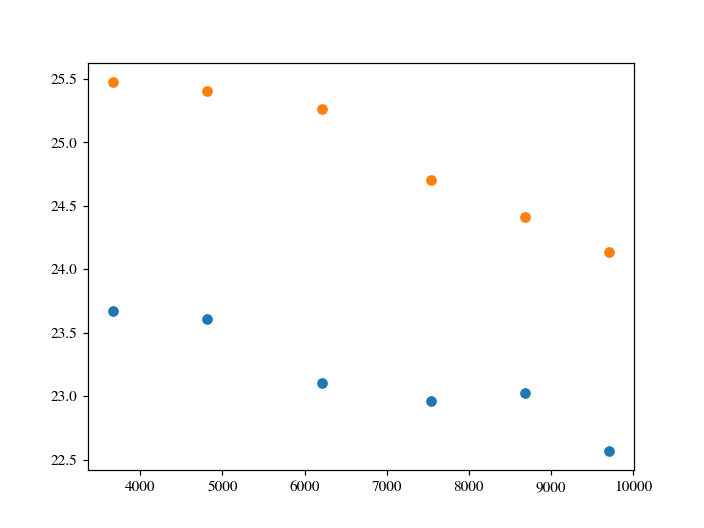

Redshift 1.0


In [108]:
for ii in range(0, zz.shape[0]):
    print('Redshift', xx.zz[ii])
    plt.plot(xx.filter_pivot, xx.obs_mag[:, ii], 'o')